In [1]:
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
df=pd.read_csv('C:/Users/91967/Downloads/archive/kidney_disease_data2.csv')

In [3]:
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.columns


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [10]:
df['sc']

0      1.2
1      0.8
2      1.8
3      3.8
4      1.4
      ... 
395    0.5
396    1.2
397    0.6
398    1.0
399    1.1
Name: sc, Length: 400, dtype: float64

In [11]:
pow(0.8,-1.154)*48

62.097682482736886

In [12]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
data=df

In [7]:
for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
        data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '6200'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    if data.iloc[i,25]=='ckd':
        data.iloc[i,25]='yes'
    if data.iloc[i,25]=='notckd':
        data.iloc[i,25]='no'

In [8]:
for i in data.drop('id',axis=1).columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

In [10]:
data.drop('id',axis=1,inplace=True)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,yes
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,yes
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,yes


In [11]:
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
data.columns=feature_names

In [12]:
for i in data.columns:
    print("unique values in {}:\n".format(i),data[i].unique())

unique values in Age (yrs):
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in Blood Pressure (mm/Hg):
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in Specific Gravity:
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in Albumin:
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in Sugar:
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in Red Blood Cells:
 [nan 'normal' 'abnormal']
unique values in Pus Cells:
 ['normal' 'abnormal' nan]
unique values in Pus Cell Clumps:
 ['notpresent' 'present' nan]
unique values in Bacteria:
 ['notpresent' 'present' nan]
unique values in Blood Glucose Random (mgs/dL):
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99.

In [13]:
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [14]:
for col in mistyped:
        data[col]=data[col].astype('float')

In [15]:
print(data['Packed Cell Volume'].unique())
print(data['White Blood Cells (cells/cmm)'].unique())
print(data['Red Blood Cells (millions/cmm)'].unique())

[44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]
[ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6

In [16]:
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('Chronic Kidney Disease')


In [17]:
categoricals

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']

In [24]:
numeric

['Blood Pressure (mm/Hg)',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Blood Urea (mgs/dL)',
 'Serum Creatinine (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)']

In [18]:
import seaborn as sns

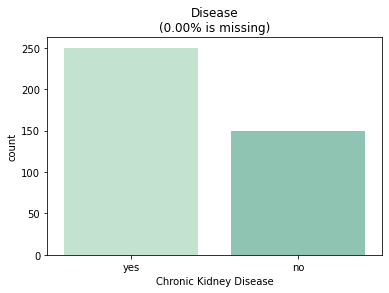

In [19]:
miss_perc="%.2f"%(100*(1-(data['Chronic Kidney Disease'].dropna().shape[0])/data.shape[0]))
    
label="Disease\n(missing:\n{}%)".format(miss_perc)
fig=sns.countplot(x=data['Chronic Kidney Disease'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("Disease\n({}% is missing)".format(miss_perc))
plt.show()

In [20]:
import matplotlib.style as style

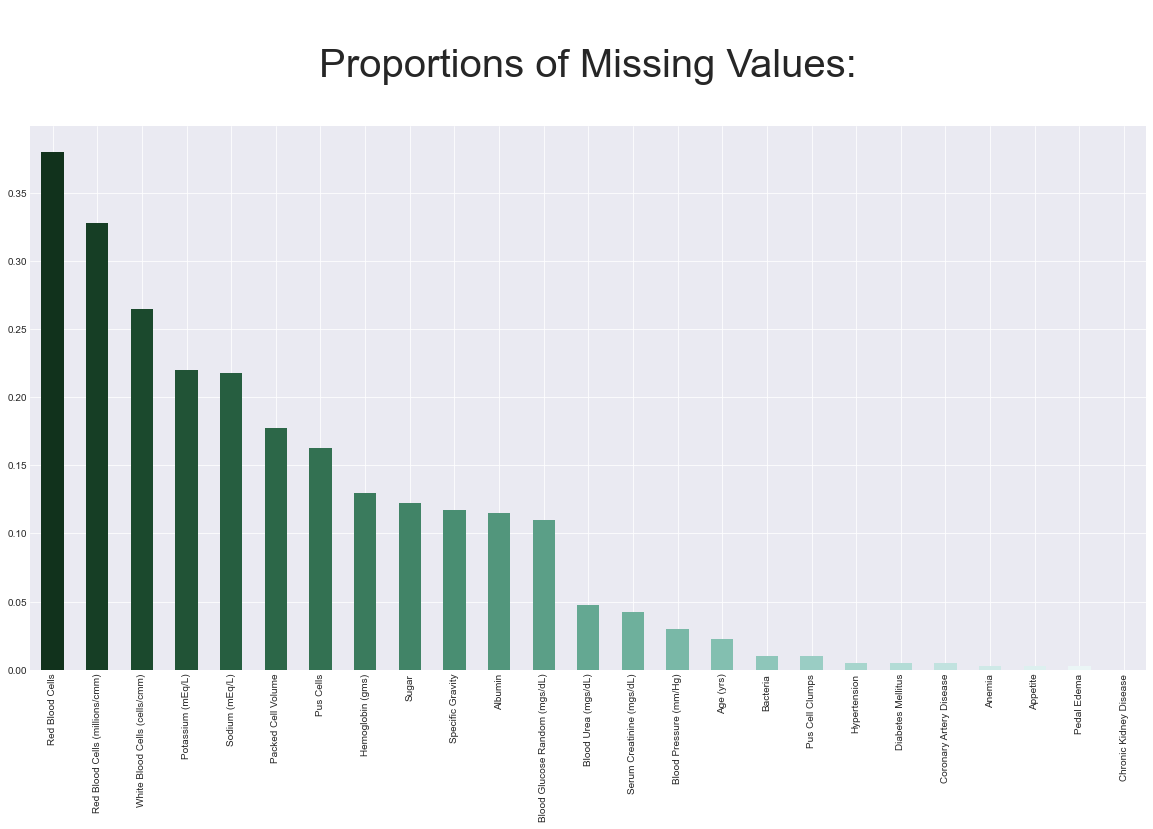

In [21]:
style.use('seaborn-darkgrid')
d=((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

In [23]:
onehotdata=pd.get_dummies(data,drop_first=True,prefix_sep=': ')
onehotdata.head()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,1,0,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,1,0,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1


In [24]:
import math
names={}
for name in data.columns:
    for ohname in onehotdata.columns:
        if name+': ' in ohname and name in categoricals:
            names[name]=ohname
            for i in range(400):
                if type(data.loc[i,name])!=str:
                    if math.isnan(data.loc[i,name]):
                        onehotdata.loc[i,ohname]=data.loc[i,name]

In [26]:
test_oh_dt=pd.DataFrame(columns=data.columns)
for col in test_oh_dt.columns:
    if col in categoricals:
        test_oh_dt[col]=onehotdata[names[col]]
    elif col=='Chronic Kidney Disease':
        test_oh_dt[col]=onehotdata['Chronic Kidney Disease: yes']
    else:
        test_oh_dt[col]=onehotdata[col]

In [27]:
((pd.isna(data)==pd.isna(test_oh_dt))==False).sum()

Age (yrs)                         0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Red Blood Cells                   0
Pus Cells                         0
Pus Cell Clumps                   0
Bacteria                          0
Blood Glucose Random (mgs/dL)     0
Blood Urea (mgs/dL)               0
Serum Creatinine (mgs/dL)         0
Sodium (mEq/L)                    0
Potassium (mEq/L)                 0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
Hypertension                      0
Diabetes Mellitus                 0
Coronary Artery Disease           0
Appetite                          0
Pedal Edema                       0
Anemia                            0
Chronic Kidney Disease            0
dtype: int64

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [30]:
NQT=QuantileTransformer(output_distribution='normal')
UQT=QuantileTransformer(output_distribution='uniform')
NSPT=PowerTransformer(standardize=False) #I'll feed its output to a normalizer and see if that makes any difference.
SPT=PowerTransformer()
RS=RobustScaler() #default
WRS=RobustScaler(quantile_range=(15,85)) # a "wider" range
SS=StandardScaler()

Transformers=[NQT,UQT,NSPT,SPT,RS,WRS,SS]
MMS=MinMaxScaler()

Pipes=[] #they're not actually pipelines, except for one,
#but initially I was going to normalize all of them, and didn't bother to change the name later
for tr in Transformers:
    p=make_pipeline(tr)
    Pipes.append(p)
Pipes[2]=make_pipeline(NSPT,MMS)


In [31]:
for pipe in Pipes:
    print(pipe)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(output_distribution='normal'))])
Pipeline(steps=[('quantiletransformer', QuantileTransformer())])
Pipeline(steps=[('powertransformer', PowerTransformer(standardize=False)),
                ('minmaxscaler', MinMaxScaler())])
Pipeline(steps=[('powertransformer', PowerTransformer())])
Pipeline(steps=[('robustscaler', RobustScaler())])
Pipeline(steps=[('robustscaler', RobustScaler(quantile_range=(15, 85)))])
Pipeline(steps=[('standardscaler', StandardScaler())])


In [32]:
datarrays=[]
for pipe in Pipes:
    arr=pipe.fit_transform(onehotdata)
    datarrays.append(arr)

C:\Personal\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (400). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Personal\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (400). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [33]:
dataframes=[onehotdata]
for arr in datarrays:
    df=pd.DataFrame(arr,columns=onehotdata.columns)
    dataframes.append(df)

In [38]:
onehotdata[::1]

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [39]:
categorical_feats=onehotdata.columns[14:]
numerical_feats=onehotdata.columns[:14]

In [40]:
from sklearn.impute import KNNImputer

In [41]:
knnimp=KNNImputer(weights='distance', n_neighbors=8)


In [42]:
rrr=[onehotdata.to_numpy()]
for dfi in range(1,len(dataframes)):
    rrr.append(knnimp.fit_transform(dataframes[dfi]))


In [43]:
arrs=[rrr[0]]
for i in range(1,len(rrr)):
    arrs.append(Pipes[i-1].inverse_transform(rrr[i]))

In [44]:
impdf=[]
for i in range(len(arrs)):
    impdf.append(pd.DataFrame(arrs[i],columns=onehotdata.columns))

In [46]:
impdf

[     Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
 0         48.0                    80.0             1.020      1.0    0.0   
 1          7.0                    50.0             1.020      4.0    0.0   
 2         62.0                    80.0             1.010      2.0    3.0   
 3         48.0                    70.0             1.005      4.0    0.0   
 4         51.0                    80.0             1.010      2.0    0.0   
 ..         ...                     ...               ...      ...    ...   
 395       55.0                    80.0             1.020      0.0    0.0   
 396       42.0                    70.0             1.025      0.0    0.0   
 397       12.0                    80.0             1.020      0.0    0.0   
 398       17.0                    60.0             1.025      0.0    0.0   
 399       58.0                    80.0             1.025      0.0    0.0   
 
      Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
 0            

In [45]:
impdf[6].iloc[:,15].unique()

array([1.        , 0.        , 0.63160166, 0.88607326, 0.61387208,
       0.75862137, 0.70806966, 0.86137172, 0.63119148, 0.89543788,
       0.74179684, 0.77161848, 0.61793009, 0.82398101, 0.75406756,
       0.36706328, 0.5835219 , 0.74235729, 0.87901676, 0.64341621,
       0.36860117, 0.78812957, 0.45736785, 0.74810413, 0.73289946,
       0.88144675, 0.75573017, 0.51257409, 0.89459771, 0.2498657 ,
       0.89557894, 0.7636394 , 0.75378168, 0.89316823, 0.76532431,
       0.83814399, 0.5902046 , 0.88189939, 0.6411361 , 0.74195041,
       0.82964032, 0.86885068, 0.63890626, 0.48569735, 0.88566203,
       0.77744959, 0.63198161, 0.73726093, 0.61095653, 0.62328647,
       0.67830806, 0.71205989, 0.78204737, 0.40201877, 0.48129177])

In [47]:
impdf[1]

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,136.0,4.7,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,90.316581,18.0,0.8,140.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,135.0,4.8,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.5,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,140.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.0,4.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.0,3.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.0,4.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.0,4.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
test=impdf.copy()
for j in range(1,8):
    dat=test[j]
    for i in range(14,25):
        col=dat.iloc[:,i]
        for k in range(400):
            if col[k]>=0.5:
                col[k]=1
            else:
                col[k]=0

In [ ]:
early_stopping_monitor = EarlyStopping(patience=5, monitor='accuracy')
Y_net = to_categorical(Y)

In [ ]:
pca_tr_acc_1=[]
    
pca_ts_acc_1=[]


pca_tr_acc_2=[]
    
pca_ts_acc_2=[]


for i in range(1,25):
    
    pca=PCA(n_components=i)
    
    X_pca=pca.fit_transform(scaled_data)
    
    X_pca_train, X_pca_test, Y_train, Y_test = train_test_split(X_pca, Y_net, test_size=0.25, random_state=12)
    #big net
    net2= Sequential()
    
    net2.add(Dense(50, activation='relu', input_shape = (i,)))
    
    net2.add(Dense(30, activation='relu'))
    
    net2.add(Dense(20, activation='relu'))
    
    net2.add(Dense(10, activation='relu'))
    
    net2.add(Dense(2, activation='softmax'))
    
    net2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    net2.fit(X_pca_train, Y_train, epochs=100, callbacks=[early_stopping_monitor], verbose=0)
    
    y_tr_pred=net2.predict(X_pca_train)
    
    pca_tr_acc_2.append(accuracy_score(np.argmax(y_tr_pred, axis=1),Y_train[:,1]))
    
    y_ts_pred=net2.predict(X_pca_test)
    
    pca_ts_acc_2.append(accuracy_score(np.argmax(y_ts_pred, axis=1),Y_test[:,1]))

In [ ]:
tr_mask = np.empty(shape=(24,1),dtype="object")
    
ts_mask = np.empty(shape=(24,1),dtype="object")

for i in range(24):
    tr_mask[i]="Training"
    ts_mask[i]="Testing"

mask = np.vstack((tr_mask,ts_mask))

mask=mask.reshape((48,))

cmps=[i for i in range(1,25)] * 2

net2_data = pd.DataFrame()
    
net2_data["PCA"] = pca_tr_acc_2 + pca_ts_acc_2

net2_data["Results"] = mask

In [ ]:
n_rows, n_cols= 1,2

figure, axes = plt.subplots(nrows=n_rows,ncols= n_cols, figsize=(30, 10))

In [ ]:
graph2=sns.barplot(x=cmps, y="PCA", hue="Results", data=net2_data, palette='cool', ax=axes[1]).set(ylim=(0.5,1))

axes[1].set_title("Big(ger) Neural Network",fontsize=30)

axes[1].set_xlabel("n° of PCA Components",fontsize=25)

axes[1].set_ylabel("Accuracy",fontsize=25)

axes[1].set_xticklabels(axes[1].get_xticklabels(),fontsize=15)

plt.show()